In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

In [5]:
ds = xr.open_dataset('/scratch/05488/tg847872/fluxbypass_aqua/AndKua_aqua_SPCAM3.0_sp_fbp_f4.cam2.h1.0001-01-09-00000.nc',
                    decode_times=False)

In [73]:
dsp4 = xr.open_dataset('/scratch/05488/tg847872/debug/AndKua_aqua_SPCAM3.0_sst_p4.cam2.h1.0000-01-01-00000.nc',
                    decode_times=False)

In [23]:
dsw1 = xr.open_dataset('/scratch/05488/tg847872/debug/SST_debug01.cam2.h1.0000-01-01-00000.nc',
                    decode_times=False)

In [24]:
TS = ds.TS.isel(time=0).values - 273.15

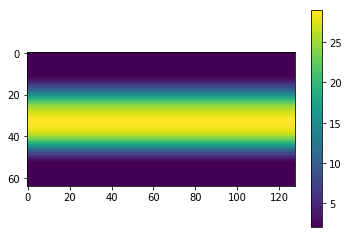

In [25]:
plt.imshow(TS); plt.colorbar();

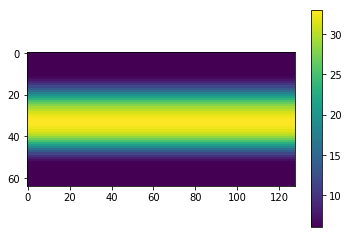

In [74]:
plt.imshow(dsp4.TS.isel(time=0).values - 273.15); plt.colorbar();

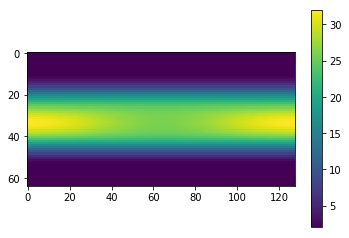

In [26]:
plt.imshow(dsw1.TS.isel(time=0).values - 273.15); plt.colorbar();

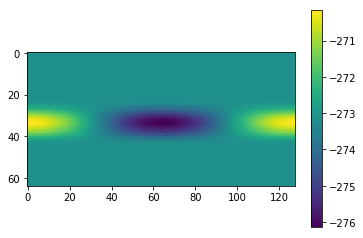

In [27]:
plt.imshow(dsw1.TS.isel(time=0).values - ds.TS.isel(time=0).values - 273.15); plt.colorbar();

In [6]:
lat, lon = ds.lat.values, ds.lon.values

In [7]:
rlat, rlon = np.deg2rad(lat), np.deg2rad(lon)

In [8]:
nlat, nlon = lat.shape[0], lon.shape[0]; nlat, nlon

(64, 128)

In [32]:
rlat

array([-1.53351258, -1.48521458, -1.43663135, -1.38798367, -1.33931156,
       -1.29062761, -1.24193706, -1.19324245, -1.14454516, -1.09584602,
       -1.04714554, -0.99844407, -0.94974185, -0.90103903, -0.85233575,
       -0.80363208, -0.75492811, -0.70622389, -0.65751945, -0.60881484,
       -0.56011008, -0.5114052 , -0.46270021, -0.41399513, -0.36528998,
       -0.31658477, -0.2678795 , -0.21917419, -0.17046885, -0.12176348,
       -0.0730581 , -0.0243527 ,  0.0243527 ,  0.0730581 ,  0.12176348,
        0.17046885,  0.21917419,  0.2678795 ,  0.31658477,  0.36528998,
        0.41399513,  0.46270021,  0.5114052 ,  0.56011008,  0.60881484,
        0.65751945,  0.70622389,  0.75492811,  0.80363208,  0.85233575,
        0.90103903,  0.94974185,  0.99844407,  1.04714554,  1.09584602,
        1.14454516,  1.19324245,  1.24193706,  1.29062761,  1.33931156,
        1.38798367,  1.43663135,  1.48521458,  1.53351258])

In [34]:
np.rad2deg(np.pi/3)

59.99999999999999

In [71]:
np.deg2rad(30.), 30/180*np.pi

(0.5235987755982988, 0.5235987755982988)

In [17]:
def C5N(const=2.):
    sst = np.empty((nlon, nlat))
    for j in range(nlat):
        if lat[j] < -60. or lat[j] > 60.:
            zeta = 1.
        elif lat[j] > 5. and lat[j] <= 60.:
            zeta = (np.sin(np.pi*(lat[j]-5.)/110.))**2
        elif lat[j] >= -60 and lat[j] < 5.:
            zeta = (np.sin(np.pi*(lat[j]-5.)/130.))**2
        for i in range(nlon):
            sst[i,j] = const + 27/2. * (2 - zeta - zeta**2)
    return sst

In [18]:
sst_c5n = C5N()

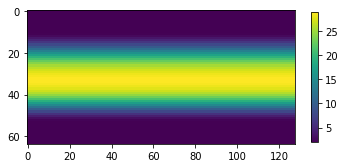

In [19]:
plt.imshow(sst_c5n.T); plt.colorbar(shrink=0.6);

In [57]:
def CTRL():
    sst = np.empty((nlon, nlat))
    for j in range(nlat):
        for i in range(nlon):
            if rlat[j] > -(np.pi/3) and rlat[j] < (np.pi/3):
                sst[i,j] = 27 * (1 - np.sin(3*rlat[j]/2)**2)
            else:
                sst[i,j] = 0.
    return sst

In [58]:
sst_ctrl = CTRL()

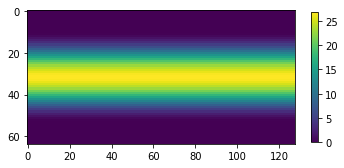

In [59]:
plt.imshow(sst_ctrl.T); plt.colorbar(shrink=0.6);

In [14]:
def s3KW1():
    sst = np.empty((nlon, nlat))
    lat_d, lon_0, xi = np.deg2rad(30), np.deg2rad(0), 3
    shift = np.deg2rad(5)
    for j in range(nlat):
        for i in range(nlon):
            if rlat[j] > (-lat_d+shift) and rlat[j] < (lat_d+shift):
                sst[i,j] = xi * np.cos(rlon[i] - lon_0) * np.cos(np.pi/2 * (rlat[j]-shift)/lat_d)**2
            else:
                sst[i,j] = 0.
    return sst

In [15]:
pert_3KW1 = s3KW1()

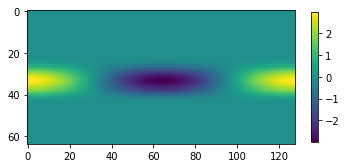

In [16]:
plt.imshow(pert_3KW1.T); plt.colorbar(shrink=0.6);

In [20]:
sst_3KW1 = sst_c5n + pert_3KW1

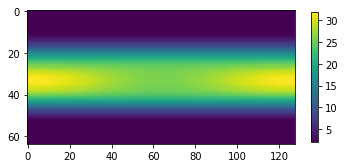

In [21]:
plt.imshow(sst_3KW1.T); plt.colorbar(shrink=0.6);

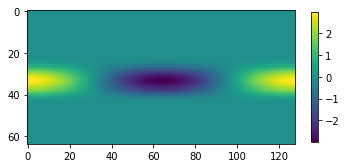

In [22]:
plt.imshow(sst_3KW1.T - sst_c5n.T); plt.colorbar(shrink=0.6);

In [8]:
dcrash = xr.open_dataset('/scratch/05488/tg847872/nnfullphy_fbp8_E001_3kw1/nnfullphy_fbp8_E001_3kw1.cam2.h1.0000-01-01-00000.nc',
                         decode_times=False)

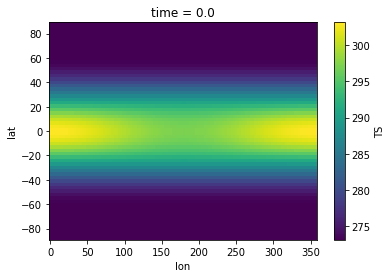

In [9]:
dcrash.TS.isel(time=0).plot()